# Introductin

This dataset has a constant wirefeed and travelspeed. The only difference is the welding current. Only every second layer is measured !

In [1]:

import weldTransform as wt
import os
import pandas as pd

# Loading the dataset

In [2]:
readColumns = ['timestamp','RIst/X','RIst/Y','RIst/Z','MD/LSZ','PD/WF',"WD/W04",'PD/FR','PD/MO','PD/LA','PD/I','WD/W02','WD/W03']
outputColumns = ['timestamp','X','Y','Z','Z-Height','WirefeedSet',"WirefeedReal",'Feedrate','Mode','Layer',"CurrentSet",'CurrentReal','VoltageReal']
filePath = r'..\data\Dataset 2\Versuch P10118.4\20241121_1229_Daten_P10118.csv' 
print(os.getcwd())
df = wt.load_dataset(filePath, readColumns, outputColumns)

#flip x and y colums so its aligned with the first dataset 
df = df.rename(columns={'X': 'Y', 'Y': 'X'})


c:\Users\stefa\Desktop\DSProject\PMD-Process-Analysis\src


In [3]:
# check unique layers for mode = 2
print(df[df['Mode'] == 2]['Layer'].unique())
#check unique layers for mode = 4
print(df[df['Mode'] == 4]['Layer'].unique())

[1. 2. 3. 4. 5. 6. 7. 8.]
[0. 1. 2. 3. 4. 5. 6. 7. 8.]


In [4]:
wt.plot3D_plotly(df,4)
wt.plot3D_plotly(df,5)

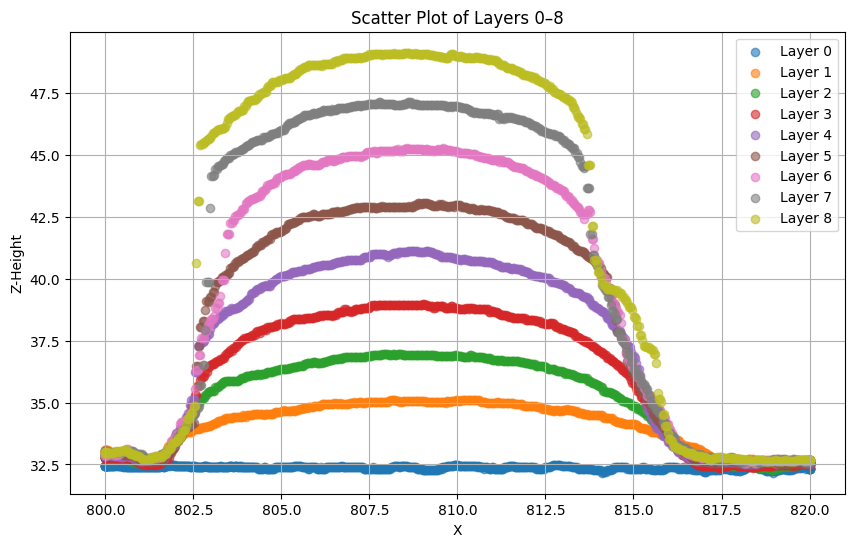

In [14]:
import matplotlib.pyplot as plt

def check(df):
    plt.figure(figsize=(10, 6))

    for layer in range(9):  # 0 to 8 inclusive
        layer_data = df[(df["Mode"] == 5) & (df["Layer"] == layer)]
        plt.scatter(layer_data["X"], layer_data["Z-Height"], label=f"Layer {layer}", alpha=0.6)

    plt.xlabel("X")
    plt.ylabel("Z-Height")
    plt.title("Scatter Plot of Layers 0–8")
    plt.legend()
    plt.grid(True)
    plt.show()

check(df)


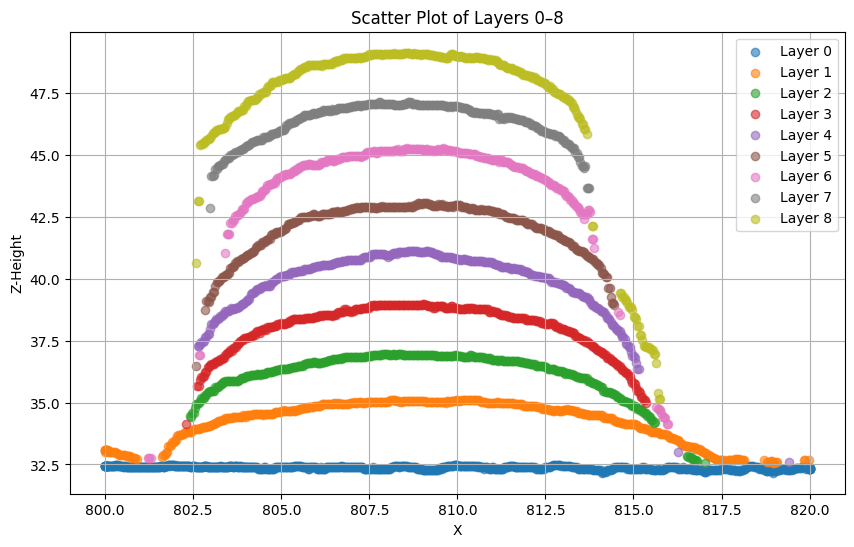

In [15]:
filtered = wt.filter_mode_5_crossection_points(df,0.3)

check(filtered)

wt.plot3D_plotly(filtered,5)

In [ ]:
wt.plot2D_crossection(df,5)